**Future contract**

This notebook delves into the performance of Platinum (PL) stock and its corresponding futures throughout a one-year period. By employing data visualization and technical analysis tools, the notebook offers a comprehensive insight into price movements, providing users with a better understanding of market trends and potential trading signals.

**Key Actions:**

1. **Data Retrieval:**
   - Utilizing the `yfinance` library, the notebook fetches historical data for Platinum stock (PL) and its futures.

2. **Visualization:**
   - Visual representations of stock and futures prices are included in the project, offering an intuitive view of their performance over the year.
   - These visualizations serve as a foundational step for grasping the overall dynamics of the market.

3. **Technical Indicators:**
   - **RSI (Relative Strength Index):**
     - The notebook calculates and presents the RSI, a momentum oscillator, to assess whether assets are in overbought or oversold conditions.

   - **Bollinger Bands (BB):**
     - Utilizing the BB indicator, the project evaluates the volatility of Platinum stock and futures, aiding in the identification of potential breakout points.

   - **MACD (Moving Average Convergence Divergence):**
     - The MACD indicator is utilized to analyze bullish or bearish trends, assisting in the identification of potential buying or selling signals.

**Dependencies:**

yfinance for data retrieval.
ta library for technical analysis indicators.

In [ ]:
# !pip install ta
from datetime import datetime, timedelta

# Grabbing stock information of a stock for give date range

ticker_symbols = ["PL"]
end = datetime.now().strftime("%Y-%m-%d")
start = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")

stock_data = yf.download(ticker_symbols, start=start, end=end)

# Print the fetched data
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2022-11-16  5.60  5.64  5.46   5.60       5.60  1856800
2022-11-17  5.50  5.51  5.10   5.11       5.11  1967000
2022-11-18  5.22  5.23  5.00   5.10       5.10  1312500
2022-11-21  5.05  5.12  4.95   5.03       5.03  1132100
2022-11-22  5.06  5.25  4.99   5.17       5.17  1299600


In [ ]:
# yfinance
import yfinance as yf

In [ ]:
from datetime import datetime, timedelta

# Grabbing stock information of a stock for give date range

ticker_symbols = ["PL=F"]
end = datetime.now().strftime("%Y-%m-%d")
start = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")

stock_data_f = yf.download(ticker_symbols, start=start, end=end)

# Print the fetched data
print(stock_data_f.head())

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-11-16  1025.500000  1025.500000  1025.500000  1025.500000  1025.500000   
2022-11-17  1000.799988  1000.799988  1000.799988  1000.799988  1000.799988   
2022-11-18  1002.000000  1002.000000  1002.000000  1002.000000  1002.000000   
2022-11-21  1005.599976  1005.599976  1005.599976  1005.599976  1005.599976   
2022-11-22  1013.400024  1013.400024  1013.400024  1013.400024  1013.400024   

            Volume  
Date                
2022-11-16       1  
2022-11-17       1  
2022-11-18       1  
2022-11-21       1  
2022-11-22       1  


In [ ]:
import pandas as pd

# Reset the index to date time
stock_data.index = pd.to_datetime(stock_data.index)
stock_data_f.index = pd.to_datetime(stock_data_f.index)

In [ ]:
# Visualise
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data["Adj Close"], name="Price"), secondary_y=False)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data_f["Adj Close"], name="Future Price"), secondary_y=True)
fig.update_layout(title_text="Spot Unit Price vs Future Unit Price Comparison")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Spot Unit Price", secondary_y=False)
fig.update_yaxes(title_text="Future Unit Price", secondary_y=True)



fig.show()

[*********************100%%**********************]  1 of 1 completed


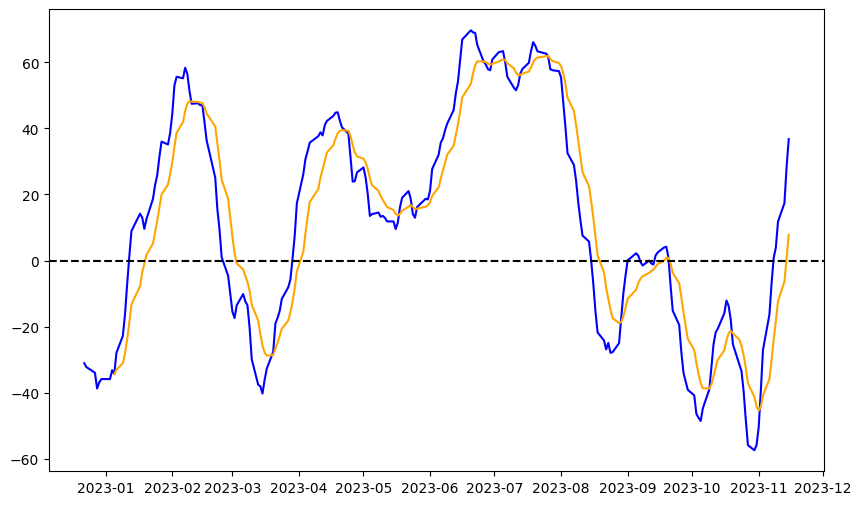

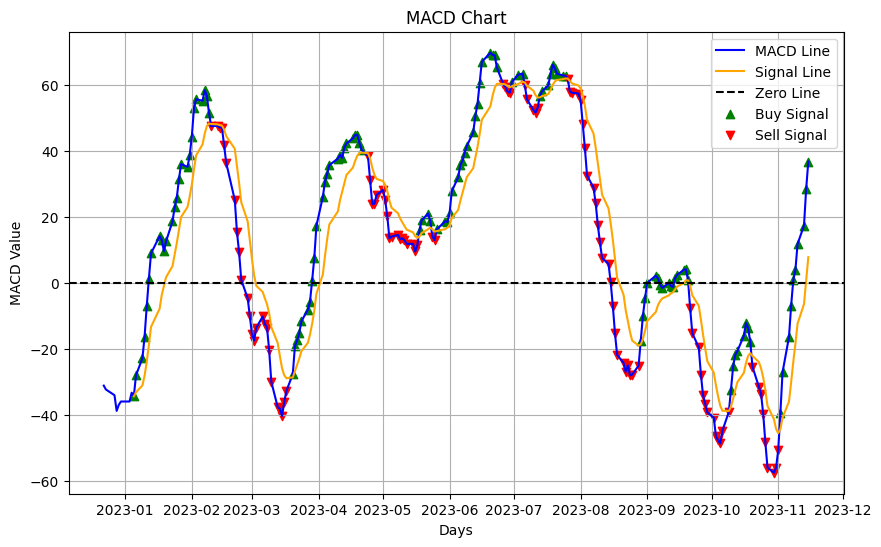

In [ ]:
# Indicators
# Dataset: The S&P 500 E-Mini futures contract is a financial derivative product that tracks the performance of the S&P 500 index
import yfinance as yf
import ta
from datetime import datetime, timedelta


futures_symbols = ["ES=F"]

end = datetime.now()
start = (datetime.now() - timedelta(days=365)).strftime("%Y-%m-%d")

futures_data = yf.download(futures_symbols, start=start, end=end, interval="1d")


# RSI -> Relative strength index

futures_data["RSI"] = ta.momentum.RSIIndicator(futures_data["Close"]).rsi()

# Bollinger Bands

bbands = ta.volatility.BollingerBands(futures_data["Close"])
futures_data["BB_upper"] = bbands.bollinger_hband()
futures_data["BB_lower"] = bbands.bollinger_lband()

# Moving Average Convergence Divergence

macd = ta.trend.MACD(futures_data["Close"])
futures_data["MACD"] = macd.macd()
futures_data["MACD_signal"] = macd.macd_signal()

# Visualise
import numpy as np
import matplotlib.pyplot as plt

macd_line = futures_data["MACD"]
signal_line = futures_data["MACD_signal"]

# Plotting the MACD chart
plt.figure(figsize=(10, 6))

# Plot MACD and Signal lines
plt.plot(futures_data.index, macd_line, label='MACD Line', color='blue')
plt.plot(futures_data.index, signal_line, label='Signal Line', color='orange')

# Plotting zero line
plt.axhline(0, linestyle='--', color='black', label='Zero Line')

# Highlight buy/sell signals (crossovers)
bullish_condition = macd_line > signal_line
bearish_condition = macd_line < signal_line

buy_signals = futures_data[bullish_condition].index
sell_signals = futures_data[bearish_condition].index

# Plotting the MACD chart
plt.figure(figsize=(10, 6))

# Plot MACD and Signal lines
plt.plot(futures_data.index, macd_line, label='MACD Line', color='blue')
plt.plot(futures_data.index, signal_line, label='Signal Line', color='orange')

# Plotting zero line
plt.axhline(0, linestyle='--', color='black', label='Zero Line')

# Highlight buy/sell signals (crossovers)
plt.scatter(buy_signals, macd_line[bullish_condition], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals, macd_line[bearish_condition], color='red', marker='v', label='Sell Signal')

# Adding labels and title
plt.title('MACD Chart')
plt.xlabel('Days')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.show()
